In [18]:
import flimview.flim as flim
import flimview.io_utils as io
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook, tqdm
import time
import multiprocessing as mp

In [19]:
def wrap(arg1):
    return io.read_ptu_frame(*arg1)

In [20]:
def get_args(view, proc):
    nframes = 20//proc
    argsp = [[header, sync, tcspc, channel, special, F0, L1, L2, view, nframes, i*nframes, 20, 16] for i in range(proc)]
    return argsp

In [21]:
ptufile = 'PTU/macrophages.ptu'
header = io.read_ptu_header(ptufile)

In [22]:
header

{'File_GUID': '{DC005AA9-07FA-4A4D-89DC-4F2E90076BFD}',
 'File_CreatingTime': time.struct_time(tm_year=2019, tm_mon=7, tm_mday=11, tm_hour=14, tm_min=24, tm_sec=50, tm_wday=3, tm_yday=192, tm_isdst=0),
 'Measurement_SubMode': 3,
 'File_Comment': '',
 'TTResult_StopReason': 1,
 'Fast_Load_End': '<empty Tag>',
 'CreatorSW_Name': 'SymPhoTime 64',
 'CreatorSW_Version': '2.3',
 'CreatorSW_SVNBuild': 4668,
 'CreatorSW_Modules': 0,
 'ImgHdr_Dimensions': 3,
 'ImgHdr_Ident': 3,
 'ImgHdr_PixX': 256,
 'ImgHdr_PixY': 256,
 'ImgHdr_PixResol': 1.0,
 'ImgHdr_LineStart': 1,
 'ImgHdr_LineStop': 2,
 'ImgHdr_Frame': 3,
 'ImgHdr_BiDirect': 'False',
 'ImgHdr_SinCorrection': 0,
 'Measurement_Mode': 3,
 'HW_Type': 'HydraHarp',
 'HW_SerialNo': '1028979',
 'HW_Version': '2.0',
 'HW_ExternalRefClock': 'False',
 'HW_Modules': 3,
 'HWModule_TypeCode(0)': 1000,
 'HWModule_VersCode(0)': 51052545,
 'HWModule_TypeCode(1)': 1010,
 'HWModule_VersCode(1)': 33554954,
 'HWModule_TypeCode(2)': 1040,
 'HWModule_VersCode(2)'

In [23]:
sync,tcspc,channel,special,index = io.read_ptu_records(ptufile, header,0, None)

In [24]:
header, sync,tcspc,channel,special,L1,L2,F0 = io.clean_ptu_oflow(header, sync, tcspc, channel, special, index)

In [25]:
proc = 2
views = 4
for view in range(views):
    argsp = get_args(view, proc)
    t0 = time.time()
    with mp.Pool(proc) as p:
        res = p.map(wrap, argsp)
    print(time.time() - t0)
    frame = np.zeros(res[0][0].shape)
    header_frame = res[0][1]
    for i in res:
        frame += res[0][0]
    del res
    vv = flim.FlimCube(frame, header_frame)
    io.saveCube(vv, filename='test_ptu.h5', group='example_ptu', subgroup='v{}'.format(view))

116.38223791122437
1.0225145816802979
1.006688117980957
0.9824252128601074


In [27]:
h5file = 'test_ptu.h5'

In [28]:
fv0 = io.loadCube(h5file, 'raw', group='example_ptu', subgroup='v0')
fv1 = io.loadCube(h5file, 'raw', group='example_ptu', subgroup='v1')
fv2 = io.loadCube(h5file, 'raw', group='example_ptu', subgroup='v2')
fv3 = io.loadCube(h5file, 'raw', group='example_ptu', subgroup='v3')

In [29]:
fv0.show_header()

File_GUID: {DC005AA9-07FA-4A4D-89DC-4F2E90076BFD}
File_CreatingTime: [2019, 7, 11, 14, 24, 50, 3, 192, 0]
Measurement_SubMode: 3
File_Comment: 
TTResult_StopReason: 1
Fast_Load_End: <empty Tag>
CreatorSW_Name: SymPhoTime 64
CreatorSW_Version: 2.3
CreatorSW_SVNBuild: 4668
CreatorSW_Modules: 0
ImgHdr_Dimensions: 3
ImgHdr_Ident: 3
ImgHdr_PixX: 256
ImgHdr_PixY: 256
ImgHdr_PixResol: 1.0
ImgHdr_LineStart: 1
ImgHdr_LineStop: 2
ImgHdr_Frame: 3
ImgHdr_BiDirect: False
ImgHdr_SinCorrection: 0
Measurement_Mode: 3
HW_Type: HydraHarp
HW_SerialNo: 1028979
HW_Version: 2.0
HW_ExternalRefClock: False
HW_Modules: 3
HWModule_TypeCode(0): 1000
HWModule_VersCode(0): 51052545
HWModule_TypeCode(1): 1010
HWModule_VersCode(1): 33554954
HWModule_TypeCode(2): 1040
HWModule_VersCode(2): 18153994
HW_Markers: 4
HWMarkers_Enabled(0): True
HWMarkers_RisingEdge(0): True
HWMarkers_Enabled(1): True
HWMarkers_RisingEdge(1): False
HWMarkers_Enabled(2): True
HWMarkers_RisingEdge(2): True
HWMarkers_Enabled(3): True
HWMarkers

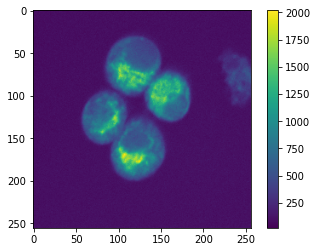

In [30]:
plt.imshow(fv0.intensity)
plt.colorbar()

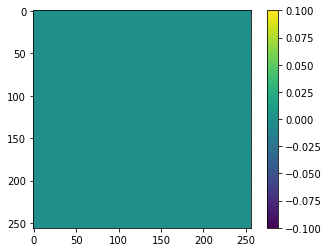

In [31]:
plt.imshow(fv1.intensity)
plt.colorbar()

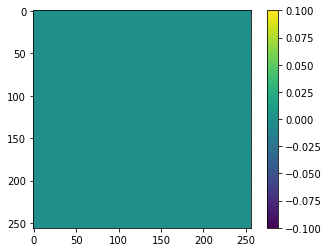

In [32]:
plt.imshow(fv2.intensity)
plt.colorbar()

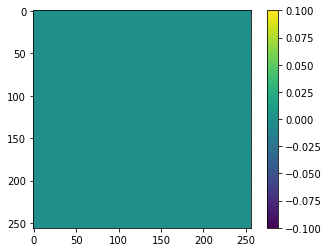

In [33]:
plt.imshow(fv3.intensity)
plt.colorbar()

In [34]:
fv0.intensity

array([[ 44.,  36.,  28., ...,  98.,  88.,  94.],
       [ 76., 102., 108., ...,  90., 106.,  90.],
       [ 78., 100.,  78., ..., 122., 104.,  74.],
       ...,
       [112., 104.,  88., ..., 116., 110., 104.],
       [124., 128., 118., ..., 106.,  80., 104.],
       [ 94., 110., 116., ..., 132., 120.,  98.]])

In [35]:
fv0_bin = flim.binCube(fv0, bin=4, kernel='gauss' )

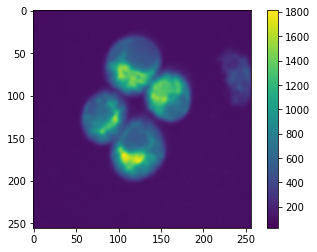

In [36]:
plt.imshow(fv0_bin.intensity)
plt.colorbar()

In [37]:
fv0_bin.mask_intensity(200)
fv0.mask_intensity(0, mask=fv0_bin.mask)

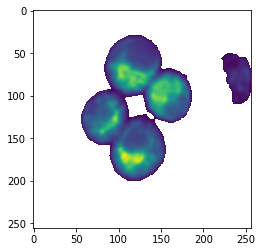

In [38]:
plt.imshow(fv0_bin.intensity)

In [39]:
t,m = flim.meanDecay(fv0_bin)

In [40]:
t1,m1,mmax,tshift = flim.cleanCurve(t,m, norm=True, threshold=0.02)

In [41]:
import flimview.models as models
mymodel = models.model1
xf,yf, pfit, pcov, chi2 = flim.fitPixel(t,m, mymodel, initial_p=[0.8, 0.3, 3, 0.03], bounds=(0, np.inf), norm=True)

In [42]:
vd = flim.getModelVars(mymodel)

In [43]:
print(flim.printModel(mymodel, pfit, pcov, chi2, oneliner=False))

model1 (chi2 = 0.006): 
a1    = 0.720 ± 0.007
tau1  = 0.432 ± 0.006
tau2  = 2.483 ± 0.075
level = 0.013 ± 0.001


In [44]:
bounds0=[0.0, 0.0, 0. , 0.]
bounds1=[1, 1., 5., 1.]

In [45]:
fv0_fit = flim.fitCube(fv0_bin, mymodel, pfit,  bounds= (bounds0, bounds1), norm=True, threshold=0.02)

100%|██████████| 256/256 [01:01<00:00,  4.17it/s]


In [46]:
io.saveCube(fv0_bin, group='example_ptu', filename='test_ptu.h5', subgroup='v0')

In [47]:
io.saveFit(fv0_fit, group='example_ptu', filename='test_ptu.h5', subgroup='v0')